Gaussian Process test

In [16]:
import numpy as np
import sys, os
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(".."))

from src.models.gaussian_process import GaussianProcessWrapper
from sklearn.model_selection import train_test_split

In [17]:
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.1, X.shape)

In [18]:
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


Initializing Gaussian Process Wrapper

In [19]:
gp_tester = GaussianProcessWrapper()

Fitting Gaussian process


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [21]:
y_preds, y_stds = gp_tester.fit(X_train, y_train).predict(X, return_std=True)

In [22]:
print(y_preds.shape)
print(y_test.shape)

(100,)
(90, 1)


In [23]:
y_preds

array([ 0.29438086,  0.34255627,  0.39482759,  0.45075804,  0.50973682,
        0.57097839,  0.63352965,  0.69628542,  0.75801202,  0.81737785,
        0.87298967,  0.92343232,  0.96730917,  1.00328048,  1.03009657,
        1.04662291,  1.05185482,  1.04492013,  1.02506921,  0.9916533 ,
        0.94409305,  0.88184146,  0.804346  ,  0.71101683,  0.60120839,
        0.47422221,  0.32933838,  0.16588191, -0.01667209, -0.21855398,
       -0.43951944, -0.6786429 , -0.93409874, -1.2029509 , -1.48097578,
       -1.76254723, -2.04061318, -2.30679187, -2.55160953, -2.76489182,
       -2.93630743, -3.05604558, -3.11559008, -3.10853385, -3.03136147,
       -2.88411586, -2.67086155, -2.39986299, -2.08341356, -1.73727908,
       -1.37975711, -1.03039724, -0.70847316, -0.43133803, -0.21282577,
       -0.06187509,  0.0184531 ,  0.03142301, -0.01355541, -0.10175581,
       -0.21456055, -0.33134918, -0.43165106, -0.49731756, -0.51445384,
       -0.47486976, -0.37686321, -0.22523181, -0.03051017,  0.19

In [24]:
# Predicción específica para validación
preds_test = gp_tester.predict(X_test)
mse = np.mean((preds_test - y_test)**2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.1172513804303983


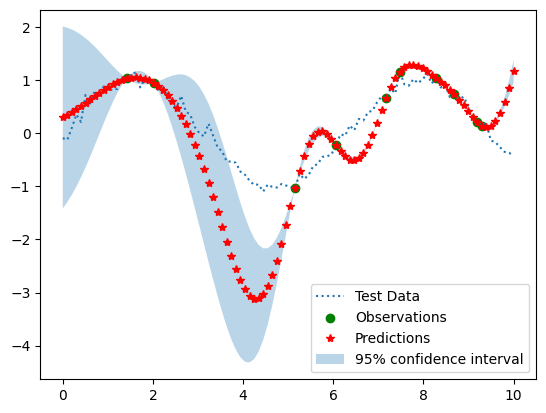

In [25]:
plt.plot(X, y ,label='Test Data', linestyle='dotted')
plt.scatter(X_train, y_train, label='Observations', color='g')
plt.plot(X, y_preds, "r*", label='Predictions')

# to see stds
plt.fill_between(X.ravel(), y_preds - 1.96 * y_stds,
                 y_preds + 1.96 * y_stds,
                 alpha=0.3,
                 label=r"95% confidence interval")
plt.legend()
plt.show()